In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score
, F1_score, percision_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

df = pd.read_csv('Patients_data.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### EDA

## Plot Data to get an overview

In [4]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [5]:
print(f'{df["Handcap"].value_counts()} \n')

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64 



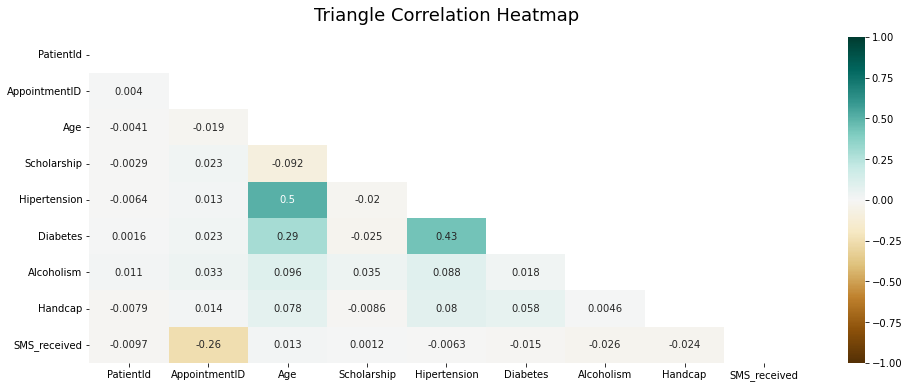

In [6]:
plt.figure(figsize=(16, 6))


mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

In [7]:

## change gender to numeric values & no_shwo to binary & Handcap to binary, rplace -1 in age
df['Handcap'] = [0 if x == 0 else 1 for x in df['Handcap']]
df.loc[df['Age'] < 0, 'Age' ] = 0

#drop columns
to_drop = ['PatientId', 'Neighbourhood', 'Scholarship','AppointmentID','ScheduledDay', 'AppointmentDay']
df.drop(to_drop, axis=1, inplace=True)

df.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,1,0,0,0,0,No
1,M,56,0,0,0,0,0,No
2,F,62,0,0,0,0,0,No
3,F,8,0,0,0,0,0,No
4,F,56,1,1,0,0,0,No


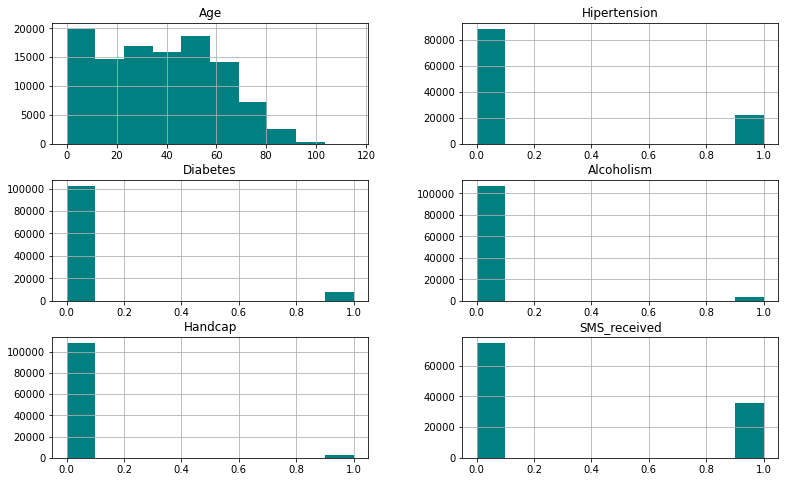

In [8]:
df.hist(figsize=(13, 8), color='teal');

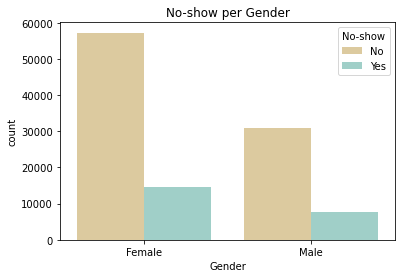

In [9]:
#noshow by gender
ax = sns.countplot(x=df.Gender, hue=df['No-show'], data=df, palette='BrBG')
ax.set_title("No-show per Gender")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [10]:

#change no-show & gender to binary 
dummy_no_show = pd.get_dummies(df['No-show'], prefix='No-show')
df['No-show'] = dummy_no_show['No-show_Yes']
df['Gender'] = [0 if x == 'M' else 1 for x in df['Gender']]
df.head()

,Gender,Age,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,1,62,1,0,0,0,0,0
1,0,56,0,0,0,0,0,0
2,1,62,0,0,0,0,0,0
3,1,8,0,0,0,0,0,0
4,1,56,1,1,0,0,0,0


## Imbalanced Data => Needs adjustment

In [11]:
df['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

In [12]:
df.shape
df_sample = df.sample(50000)

#features
X = df_sample.iloc[:, 0:6]

#target
y = df_sample['No-show']
print(y.value_counts())


#scale data
X = StandardScaler().fit_transform(X)


0    39851
1    10149
Name: No-show, dtype: int64


In [13]:
# oversample minority / undersample majority

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

over = SMOTE(sampling_strategy=0.5)
under = RandomUnderSampler(sampling_strategy=0.6)
steps = [('o', over),('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset
X, y = pipeline.fit_resample(X, y)
y.value_counts()

0    33208
1    19925
Name: No-show, dtype: int64

### Fit & Train

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=15)
from sklearn.model_selection import cross_validate
# Define Algorithms
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('Random Forest',RandomForestClassifier()))

# evaluate each model
results = []
names = []

for name, model in models:
        kfold = StratifiedKFold(n_splits=10, random_state=6, shuffle=True)
        cv_results = cross_validate(model, X_train, Y_train, cv=kfold, scoring=['accuracy', 'balanced_accuracy'])
        results.append(cv_results)
        names.append(name)
        print('%s: %s %.3f %s %.3f' % (name, 'Accuracy' ,cv_results['test_accuracy'].mean()
                                      , 'Balanced Accuracy', cv_results['test_balanced_accuracy'].mean()))
 

Logistic Regression: Accuracy 0.626 Balanced Accuracy 0.500
Random Forest: Accuracy 0.627 Balanced Accuracy 0.518


# Predict 

[[6588    0]
 [4039    0]]
              precision    recall  f1-score   support

           0       0.62      1.00      0.77      6588
           1       0.00      0.00      0.00      4039

    accuracy                           0.62     10627
   macro avg       0.31      0.50      0.38     10627
weighted avg       0.38      0.62      0.47     10627



C:\Users\11011196\Anaconda3\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\11011196\Anaconda3\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\11011196\Anaconda3\envs\metis\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


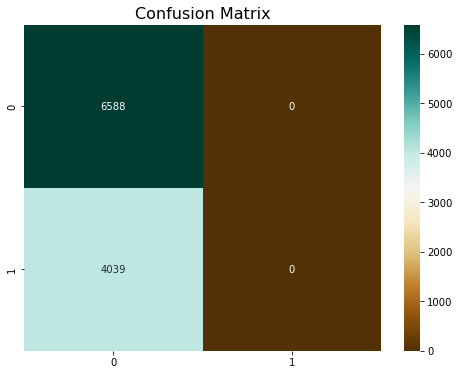

In [15]:
##Logestic Regression
# Make predictions on test dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)

# visualize result 
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='BrBG',fmt='g');

# Evaluate predictions
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))

[[6324  264]
 [3728  311]]
              precision    recall  f1-score   support

           0       0.63      0.96      0.76      6588
           1       0.54      0.08      0.13      4039

    accuracy                           0.62     10627
   macro avg       0.58      0.52      0.45     10627
weighted avg       0.60      0.62      0.52     10627



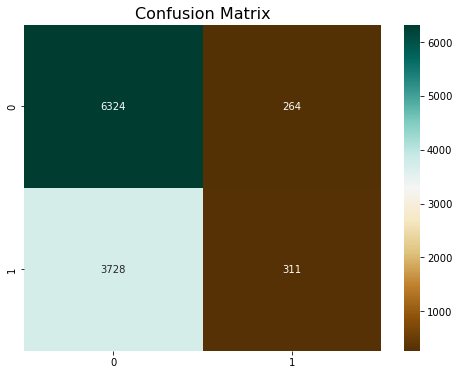

In [16]:
## Random Forest
# Make predictions on test dataset
model = RandomForestClassifier(random_state=42)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)


# visualize result 
cm = confusion_matrix(Y_test, predictions)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='BrBG',fmt='g');

# Evaluate predictions
print(confusion_matrix(Y_test, predictions))
print(classification_report(Y_test, predictions))